In [1]:
import pandas as pd
import scanpy as sc 
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import os,re


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', 'No data for colormapping provided via', UserWarning)

In [3]:
plt.style.use('default')
plt.rcParams['figure.figsize'] =                                           [4, 4]
plt.rcParams['figure.dpi'] = 300

In [4]:
adata=sc.read_h5ad('/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad')

In [5]:
Tcell=adata[adata.obs.Cell_lineage.isin(["T/ILC"])]

In [6]:
Tcell

View of AnnData object with n_obs × n_vars = 91653 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_cell_type_num_colors', 'New_Body_colors', 'TCRBCRlabel_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

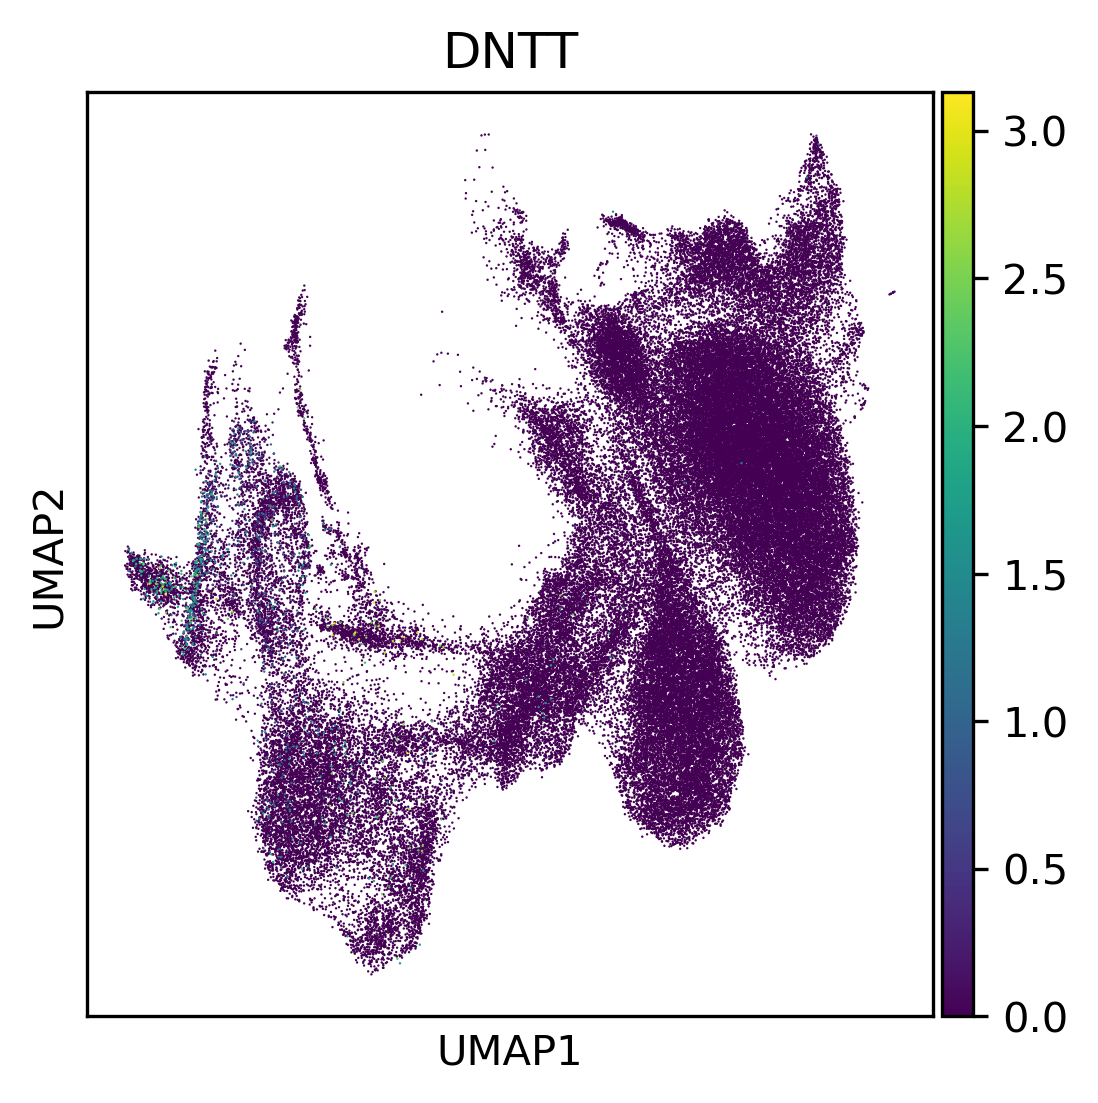

In [7]:
sc.pl.umap(Tcell,color="DNTT")

In [8]:
Thymuscell=adata[adata.obs.New_Body.isin(["Thymus"])]

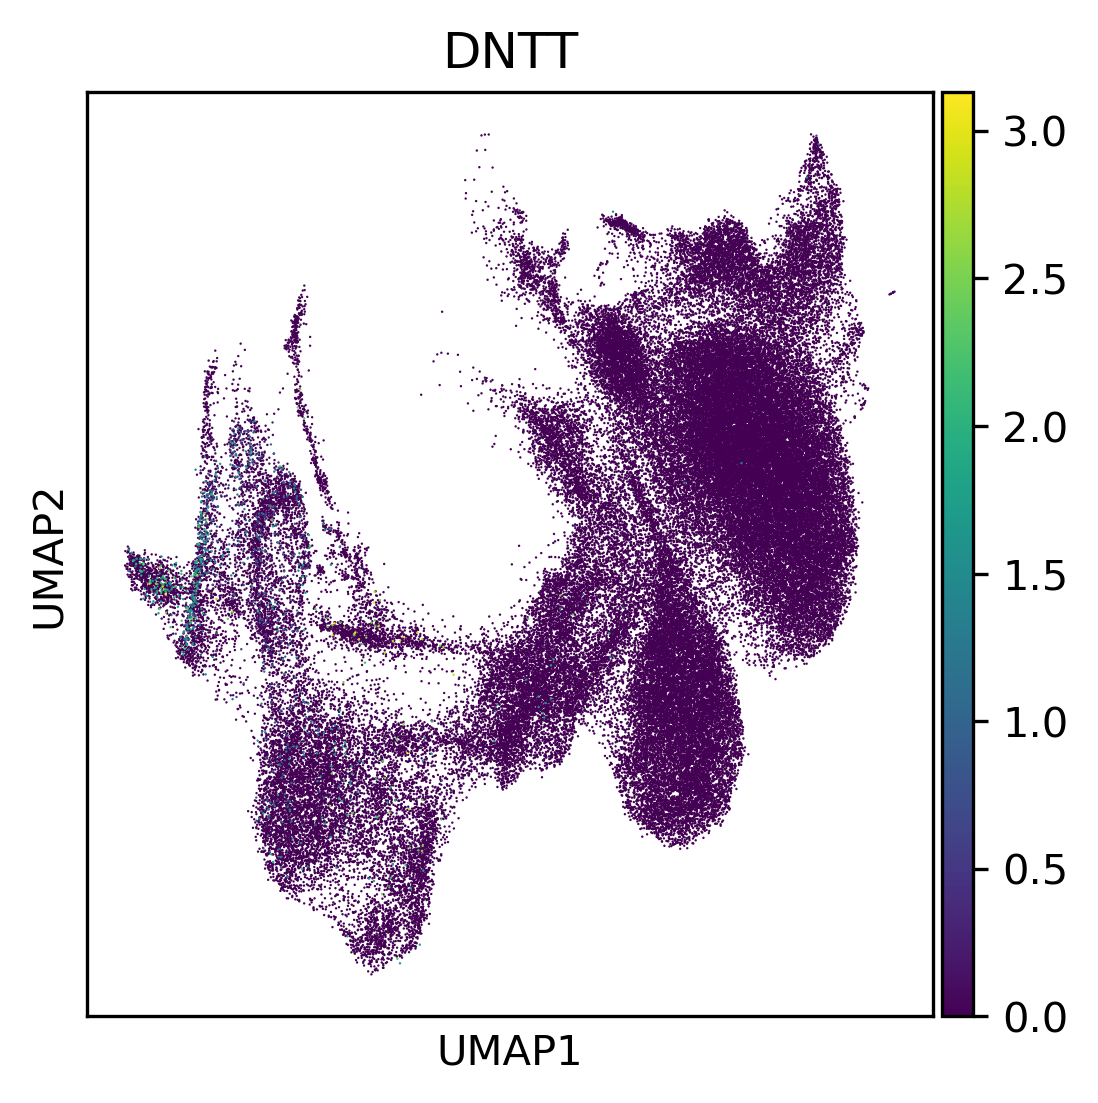

In [9]:
sc.pl.umap(Tcell,color="DNTT")

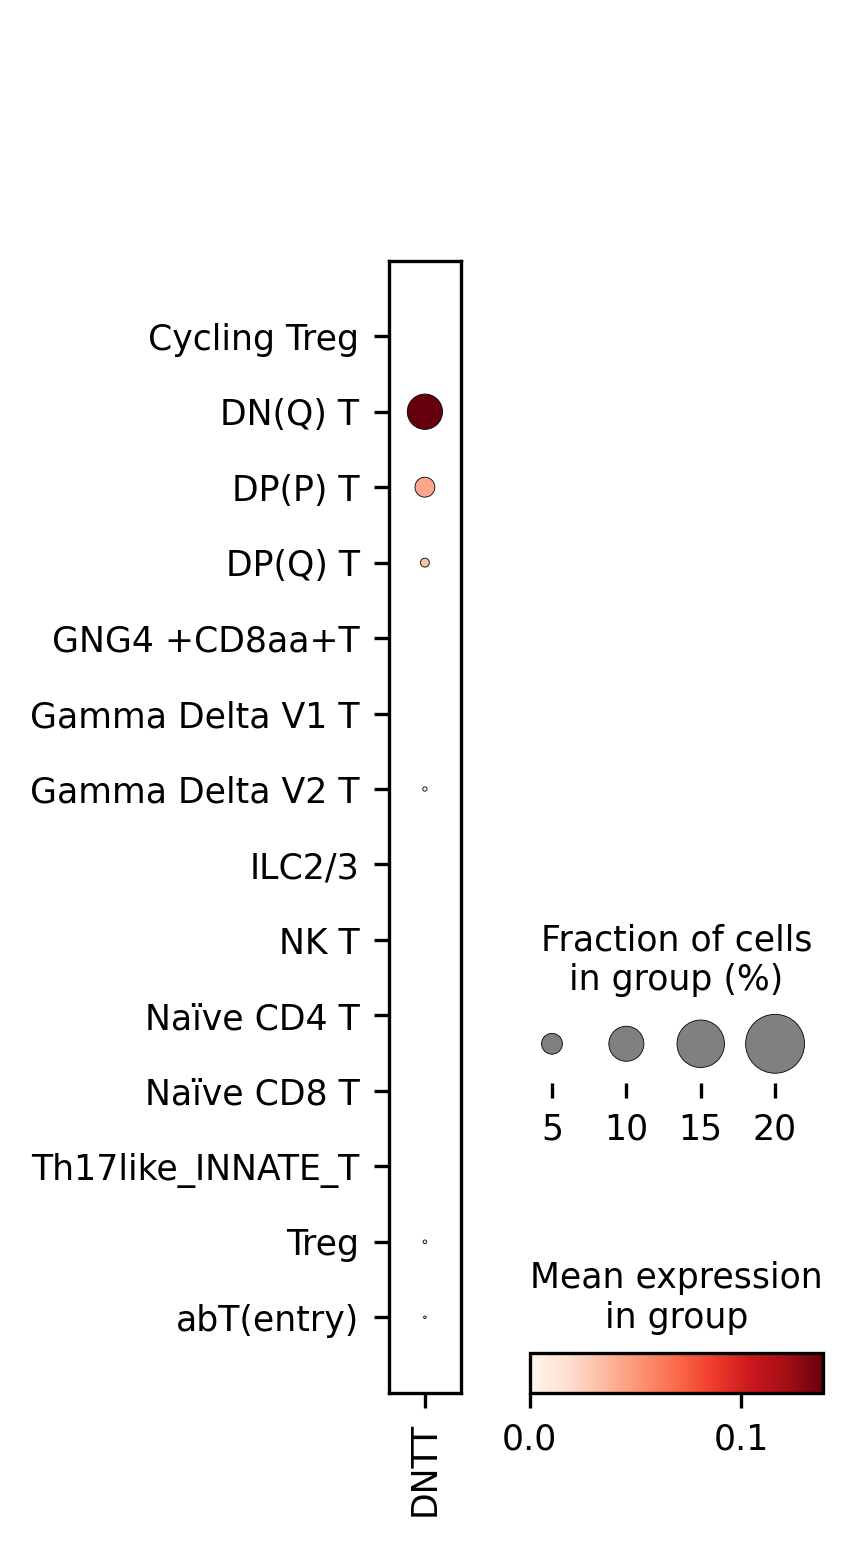

In [10]:
sc.pl.dotplot(Tcell[Tcell.obs.New_Body.isin(["Thymus"])],"DNTT","Last_cell_type")

In [11]:
Thy=Tcell[Tcell.obs.New_Body.isin(["Thymus"])]
DN=Thy[Thy.obs.Last_cell_type.isin(["DN(Q) T"])]
DN.obs["Time_DN"]=DN.obs["AdjustedID"].astype("str")+"_"+DN.obs["Last_cell_type"].astype("str")
# Thy.obs.Last_cell_type

/tmp/ipykernel_107000/2240858169.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  DN.obs["Time_DN"]=DN.obs["AdjustedID"].astype("str")+"_"+DN.obs["Last_cell_type"].astype("str")


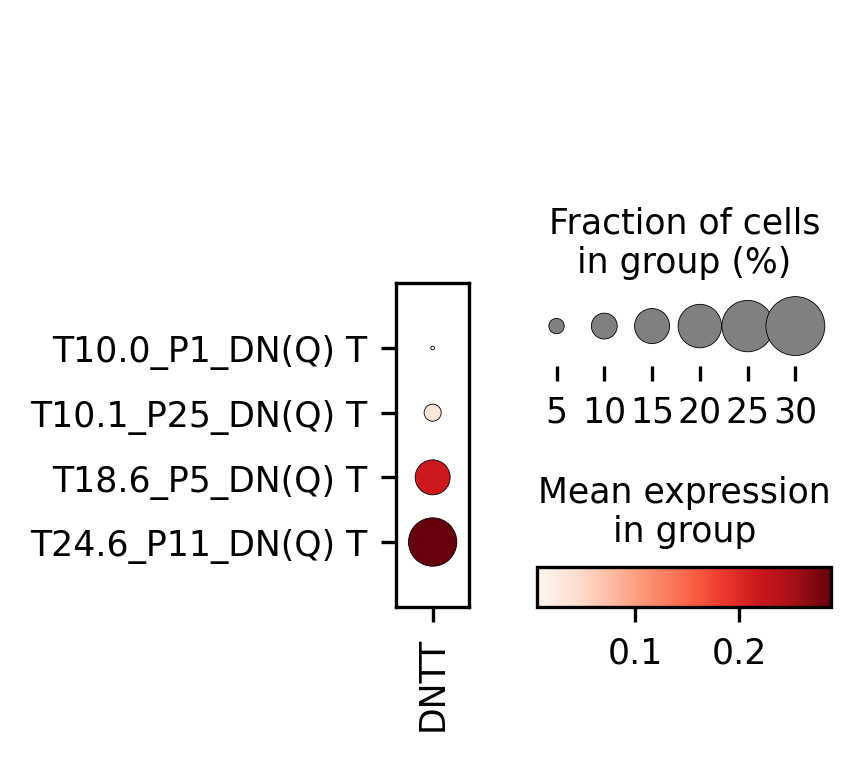

In [12]:
sc.pl.dotplot(DN,"DNTT","Time_DN",show=False)
plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure4/Figure4O_DNTT.pdf",bbox_inches="tight")

In [13]:
Liver=adata[adata.obs.New_Body.isin(["Liver"])]
LiverB=Liver[Liver.obs.Last_cell_type.isin(["Pro-B"])]
LiverB.obs["Time_ProB"]=LiverB.obs["AdjustedID"].astype("str")+"_"+LiverB.obs["Last_cell_type"].astype("str")
# Liver.obs.Last_cell_type.value_counts()

/tmp/ipykernel_107000/2179805022.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  LiverB.obs["Time_ProB"]=LiverB.obs["AdjustedID"].astype("str")+"_"+LiverB.obs["Last_cell_type"].astype("str")


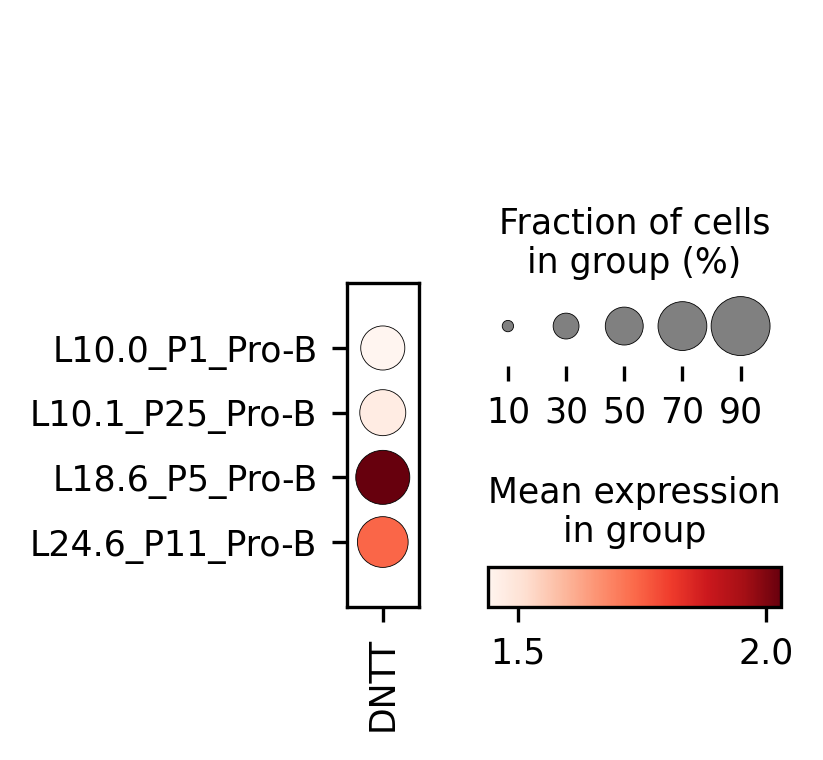

In [14]:
sc.pl.dotplot(LiverB,"DNTT","Time_ProB",show=False)
plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Main_Figure4/Figure4O_DNTTinProB.pdf",bbox_inches="tight")